In [1]:

import random
import math
import io
import cairocffi as cairo
from scipy.ndimage import imread
from matplotlib.image import imsave
from scipy.misc import imresize
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import gzip

from PIL import Image
%matplotlib inline

f = open("data/k1001.txt")
ko_chset = f.read().splitlines()
print("loaded %d characters" % len(ko_chset))

en_chset = []
en_chset.extend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
en_chset.extend(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",\
              "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"])
en_chset.extend(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N",\
              "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])
en_chset.extend(["(", ")", "'", "\"", ".", ",", ":", ";", "!", "?", "/", "@", "#", "$",\
              "%", "^", "&", "*", "[", "]", "{", "}", "<", ">", "~", "-"])

all_chset = ko_chset + en_chset

def get_random_ch(chset=all_chset):
    return chset[random.randrange(0,len(chset))]

loaded 2350 characters


In [2]:
WIDTH, HEIGHT = 120, 120
surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
ctx = cairo.Context (surface)
ctx.set_font_size(40)

def get_text_width(text):
    extent = ctx.text_extents(text)
    xbearing, ybearing, width, height, xadvance, yadvance = extent
    return width

def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Not RGB!")
        return rgb
    
def write_ch(x, y, ch):
    ctx.move_to(x, y)
    ctx.show_text(ch)

# Generate 3 X 3 matrix
def generate_mat(target, font, weight="NORMAL"):
    if weight == "BOLD":
        weight = cairo.FONT_WEIGHT_BOLD
    else:
        weight = cairo.FONT_WEIGHT_NORMAL
        
    left_blank = random.choice([True, False])
    right_blank = random.choice([True, False])
    
    ctx.set_source_rgb(1, 1, 1)
    ctx.paint()
    ctx.set_source_rgb(0, 0, 0)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
            weight)
    
    write_ch(0, 34, get_random_ch())
    write_ch(40, 34, get_random_ch())
    write_ch(80, 34, get_random_ch())
    
    offset = (38 - get_text_width(target))/2
    
    if offset > 12:
        offset = 12
        
    if left_blank:
        ctx.move_to(-10 + offset, 74)
    else:
        ctx.move_to(2 + offset, 74)
    ctx.show_text(get_random_ch())
    ctx.move_to(40 + offset, 74)
    ctx.show_text(target)
    if right_blank:
        ctx.move_to(90 - offset, 74)
    else:
        ctx.move_to(78 - offset, 74)
    ctx.show_text(get_random_ch())
    
    write_ch(0, 114, get_random_ch())
    write_ch(40, 114, get_random_ch())
    write_ch(80, 114, get_random_ch())

    fb = io.BytesIO()
    surface.write_to_png (fb)
    mat = imread(fb)
    fb.close()
    return rgb2gray(mat)

# Slice a target character from 3 X 3 matrix
def slice_img(mat):
    x_offset = random.randrange(-3, 3)
    y_offset = random.randrange(-3, 3)
    scale_factor = random.randrange(42, 48)
    x_start = round(60 - scale_factor / 2) + x_offset
    x_end = round(60 + scale_factor / 2) + x_offset
    y_start = round(60 - scale_factor / 2) + y_offset
    y_end = round(60 + scale_factor / 2) + y_offset
    sliced = mat[y_start:y_end, x_start:x_end]
    return imresize(sliced, [32, 32])

# Helper function to draw 3 X 3 plots
def draw_subplot(array, w, h):
    plt.figure(num=None, figsize=(3, 3), facecolor='w', edgecolor='k')
    for i in range(len(array)):
        plt.subplot(w,h,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(array[i], interpolation="none", cmap=plt.get_cmap("gray"))

print ("function loaded")

function loaded


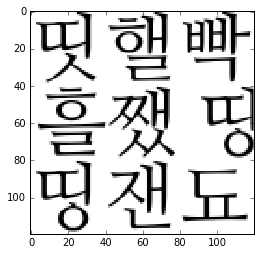

In [3]:
mat1 = generate_mat(get_random_ch(),"NanumMyeongjo", "NORMAL")

plt.figure()
plt.imshow(mat1, interpolation="none", cmap=plt.get_cmap("gray"))

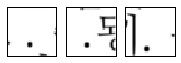

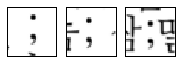

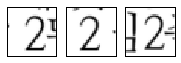

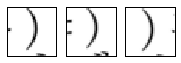

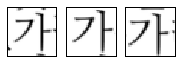

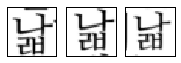

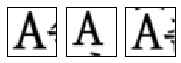

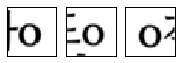

In [4]:
sliced = [slice_img(generate_mat(".","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat(";","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("2","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat(")","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("가","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("낣","NanumMyeongjo", "NORMAL")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("A","NanumMyeongjo", "BOLD")) for i in range(3)]
draw_subplot(sliced, 1, 3)

sliced = [slice_img(generate_mat("o","NanumMyeongjo", "BOLD")) for i in range(3)]
draw_subplot(sliced, 1, 3)

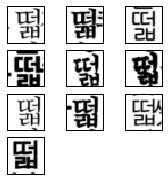

In [5]:
import itertools
import json

fonts = ["NanumMyeongjo", "NanumGothic", "Gungsuh", "Batang", "Dotum"]
weights = ["NORMAL", "BOLD"]


def show_example(ch, fonts, weights):
    sliced = []
    for font, weight in itertools.product(fonts, weights):
        sliced.append(slice_img(generate_mat(ch, font, weight)))
    draw_subplot(sliced, math.ceil(len(sliced)/3), 3)
    
show_example("떫", fonts, weights)

In [16]:
def save_chset(chset, base_path, repeat):
    print ("saving into %s..." % base_path)
    index_data = []

    tar = tarfile.open(base_path+"data.tar.gz", "w:gz")

    for ch, font, weight in itertools.product(chset, fonts, weights):
        # Gungsuh bold is corrupted
        if font == "Gungsuh" and weight == "BOLD":
            continue
        for i in range(repeat):
            if len(index_data) % 10000 == 0:
                print ("saving %7dth data...\r" % (len(index_data)+1))
            pathname = "%07d.png" % len(index_data)
            sliced = slice_img(generate_mat(ch, font, weight))
            ft = io.BytesIO()
            Image.fromarray(sliced, mode='L').save(ft, format="PNG", optimize=True, compress_level=9)
            index_data.append({'path': pathname, 'font': font, 'weight': weight, 'target': ch})
            ti = tarfile.TarInfo(pathname)
            ti.size = ft.getbuffer().nbytes
            ft.seek(0)
            tar.addfile(ti, ft)
            ft.close()

    tar.close()

    with gzip.open(base_path+'index.json.gz', 'wt') as outfile:
        print ("saving index json...")
        json.dump(index_data, outfile, indent=4, sort_keys=True, separators=(',', ':'))
        outfile.close()

    print ("done")

In [19]:
save_chset(en_chset, "data/en/", 100)

saving into data/en/...
saving       1th data...
saving   10001th data...
saving   20001th data...
saving   30001th data...
saving   40001th data...
saving   50001th data...
saving   60001th data...
saving   70001th data...
saving index json...
done


In [20]:
save_chset(ko_chset, "data/ko/", 10)

saving into data/ko/...
saving       1th data...
saving   10001th data...
saving   20001th data...
saving   30001th data...
saving   40001th data...
saving   50001th data...
saving   60001th data...
saving   70001th data...
saving   80001th data...
saving   90001th data...
saving  100001th data...
saving  110001th data...
saving  120001th data...
saving  130001th data...
saving  140001th data...
saving  150001th data...
saving  160001th data...
saving  170001th data...
saving  180001th data...
saving  190001th data...
saving  200001th data...
saving  210001th data...
saving index json...
done
